In [1]:
# Library to interact with the OS
import os

# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

PROJECT_DIR = os.path.join(os.path.dirname('preprocessing.ipynb'), os.pardir)

In [3]:
is_df = pd.read_excel("Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")

is_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [4]:
# Dataset Info
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


In [5]:
# Missing value count
is_df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [6]:
# Dropping the index column
is_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Duplicates
is_df.duplicated().sum()

7

In [8]:
# Dropping duplicates
is_df.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
print('Value Counts')
print('*'*50)
for col in is_df.columns:
    if col not in ['Data', 'Description']:
        print(is_df[col].value_counts())
        print('-'*50)

Value Counts
**************************************************
Countries
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64
--------------------------------------------------
Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
--------------------------------------------------
Industry Sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64
--------------------------------------------------
Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64
--------------------------------------------------
Potential Accident Level
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: count, dtype: int64
--------------------------------------------------
Genre
Male      396
Female     22
Name: count, dtype: int64
----------------------

In [10]:
# Rename 'Data', 'Countries', 'Genre' columns in Data frame
is_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender'}, inplace=True)

In [11]:
def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    
    """

    figure,axes = plt.subplots(nrows =1,ncols = 2,figsize=(20,10))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index,ax = axes[1]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:1.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

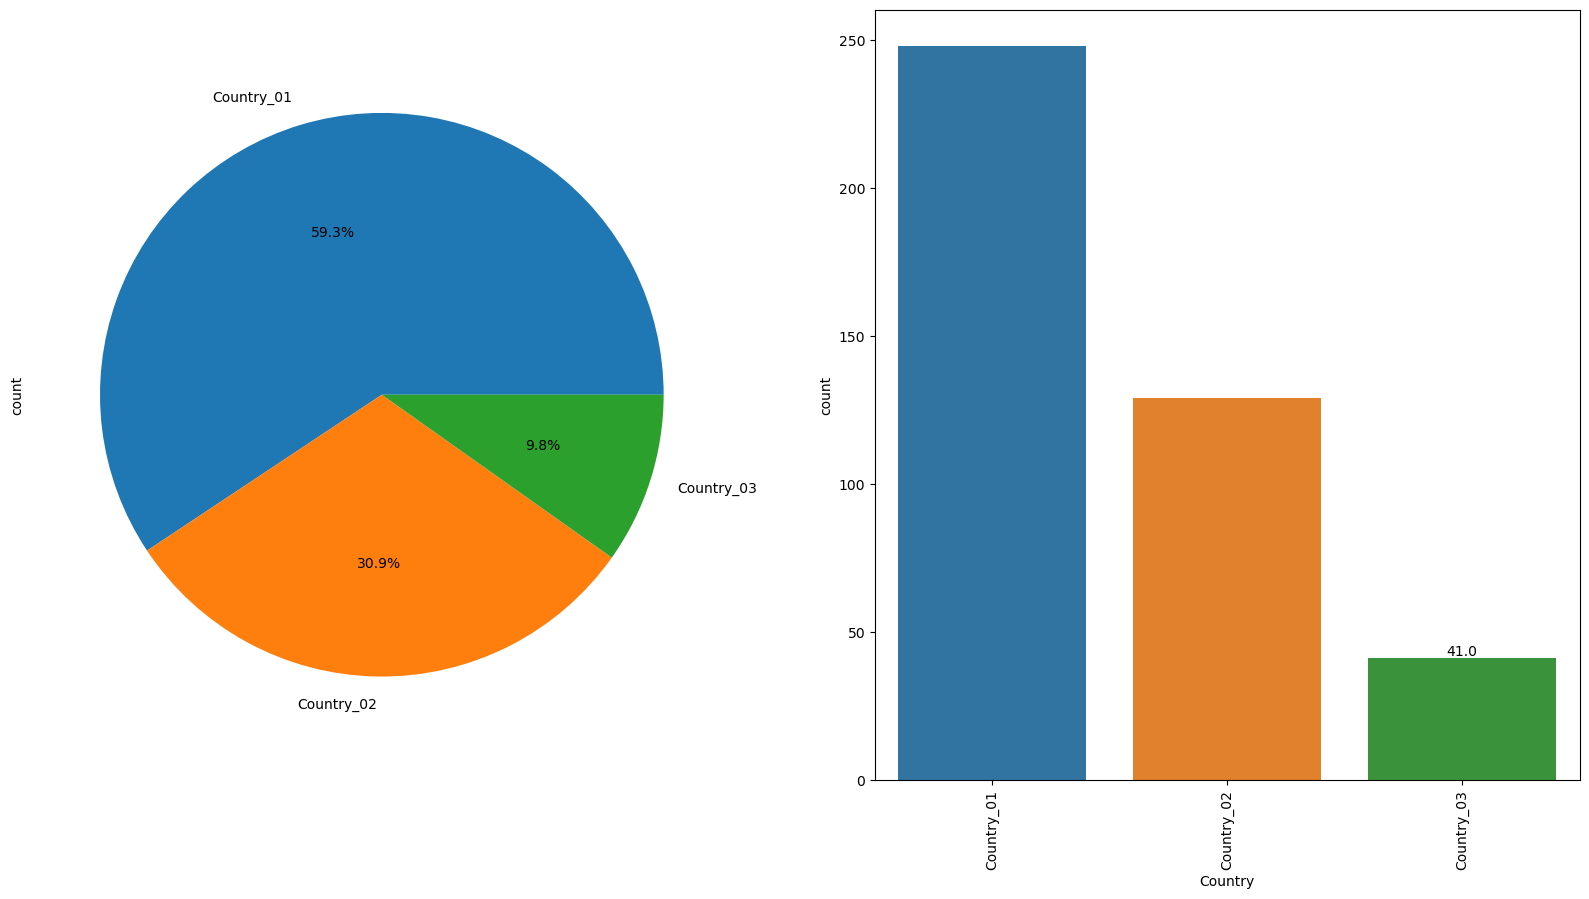

In [12]:
# Country distribution
labeled_barplot(is_df, 'Country', perc=False)

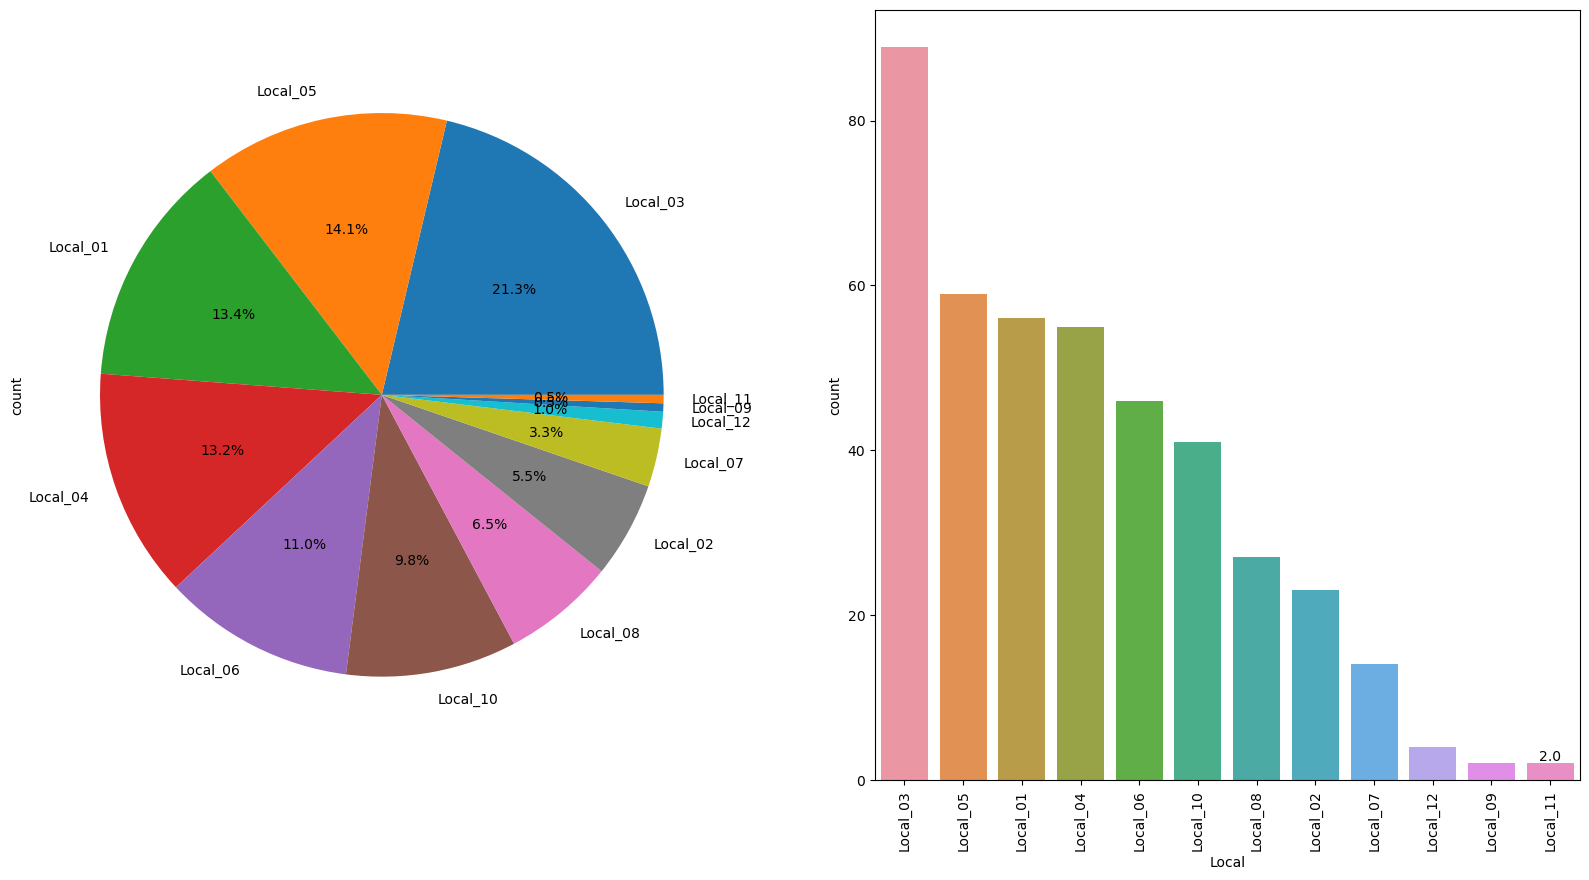

In [13]:
# Local region distribution
labeled_barplot(is_df, 'Local', perc=False)

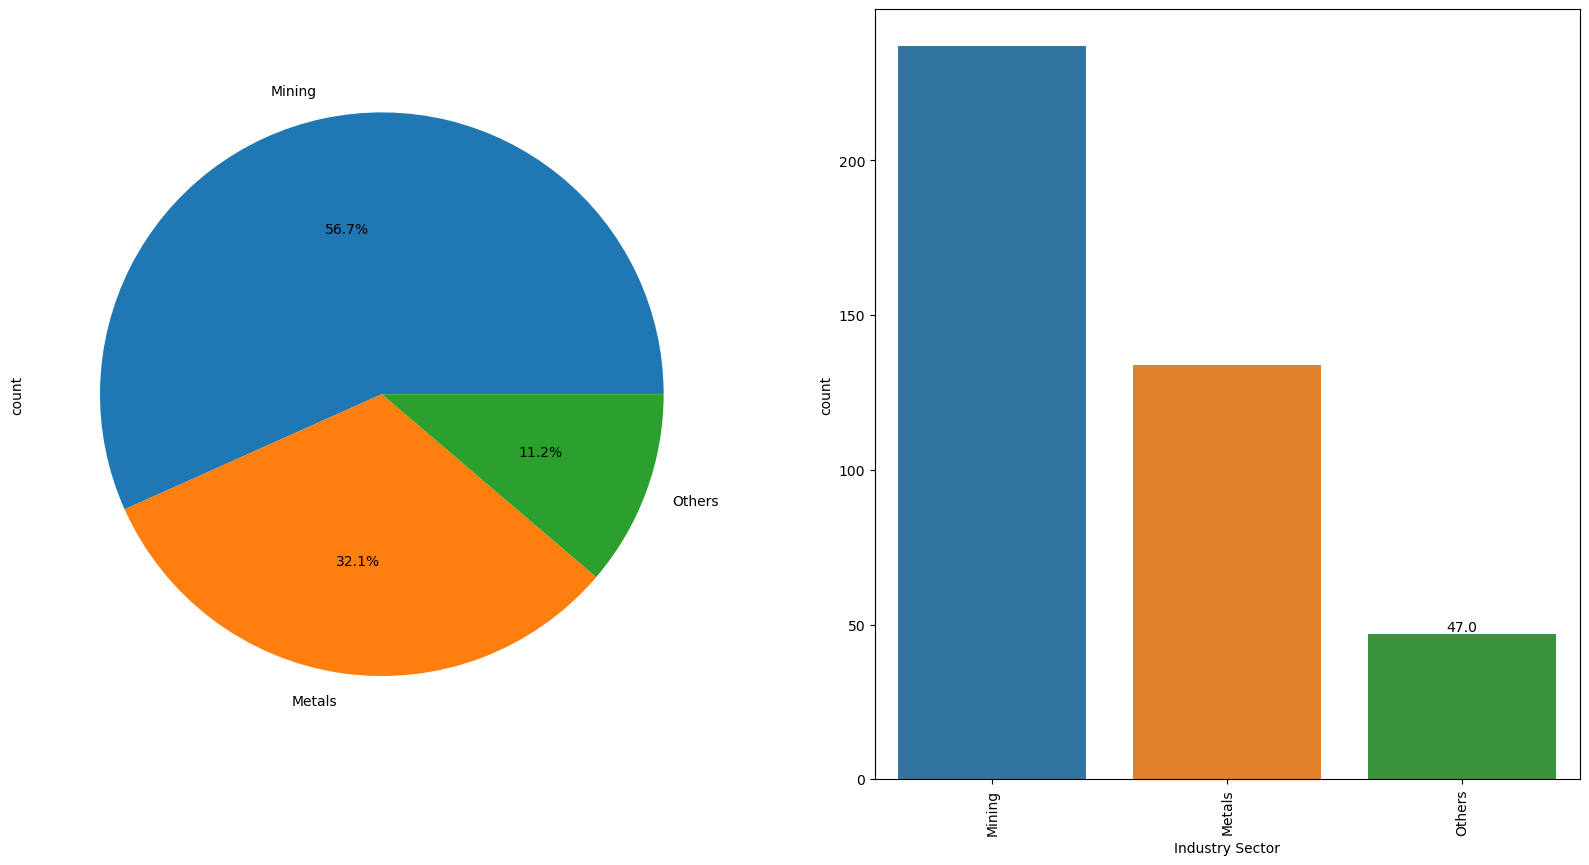

In [14]:
# Industry Sector distribution
labeled_barplot(is_df, 'Industry Sector', perc=False)

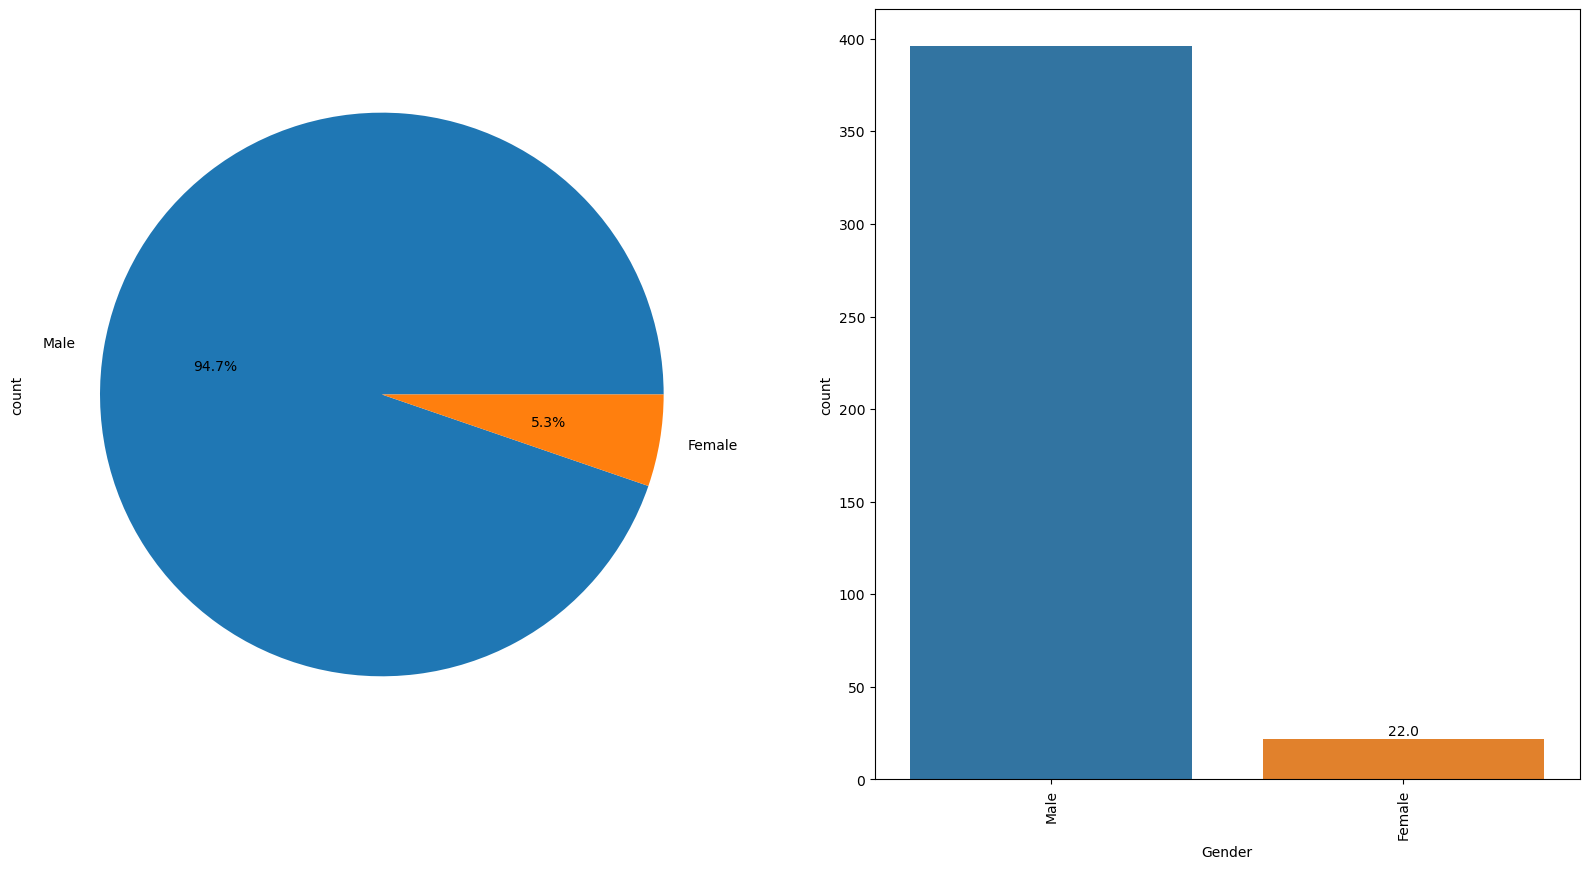

In [15]:
# Gender distribution
labeled_barplot(is_df, 'Gender', perc=False)

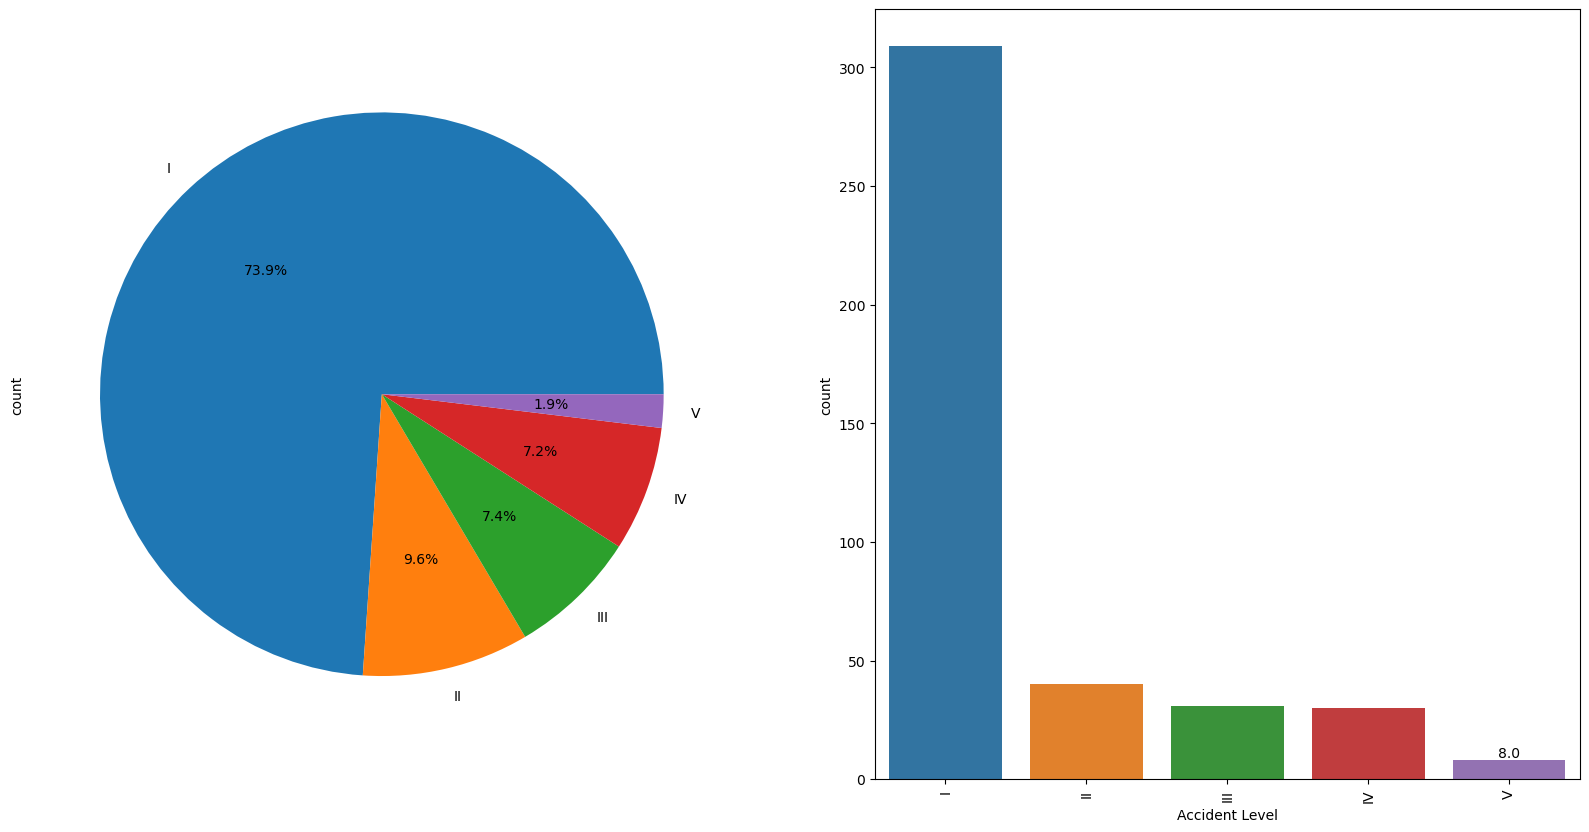

In [16]:
# Accident Level distribution
labeled_barplot(is_df, 'Accident Level', perc=False)

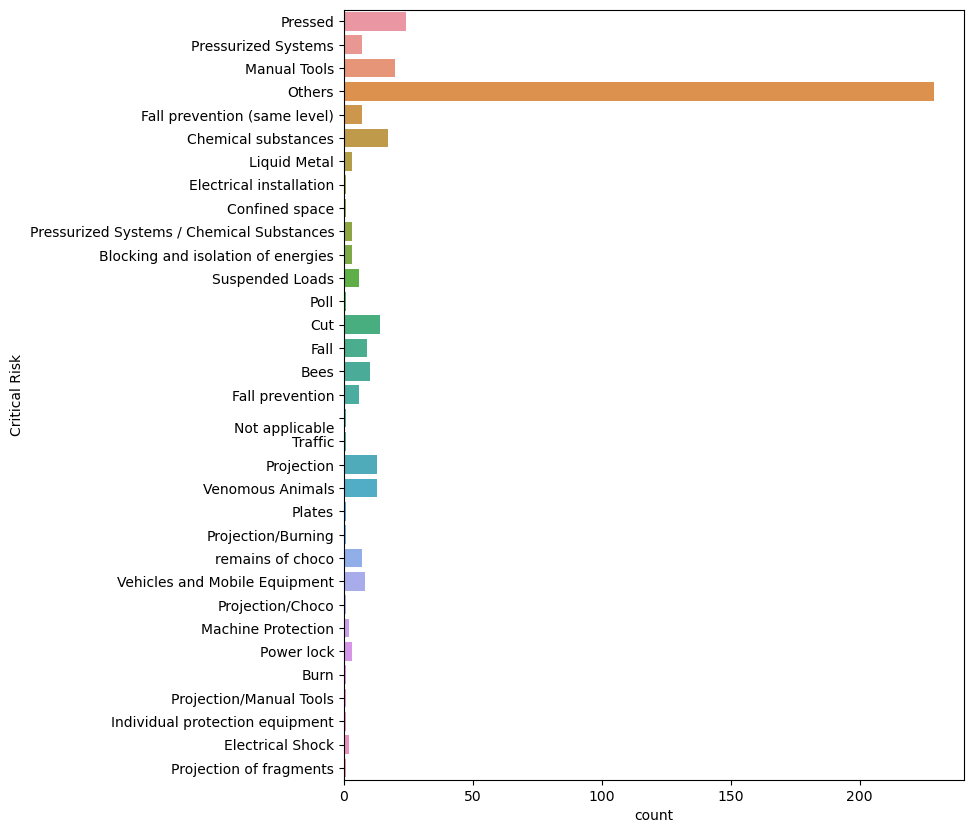

In [17]:
# Critical Risk distribution
plt.figure(figsize=(8, 10))
sns.countplot(is_df, y='Critical Risk');

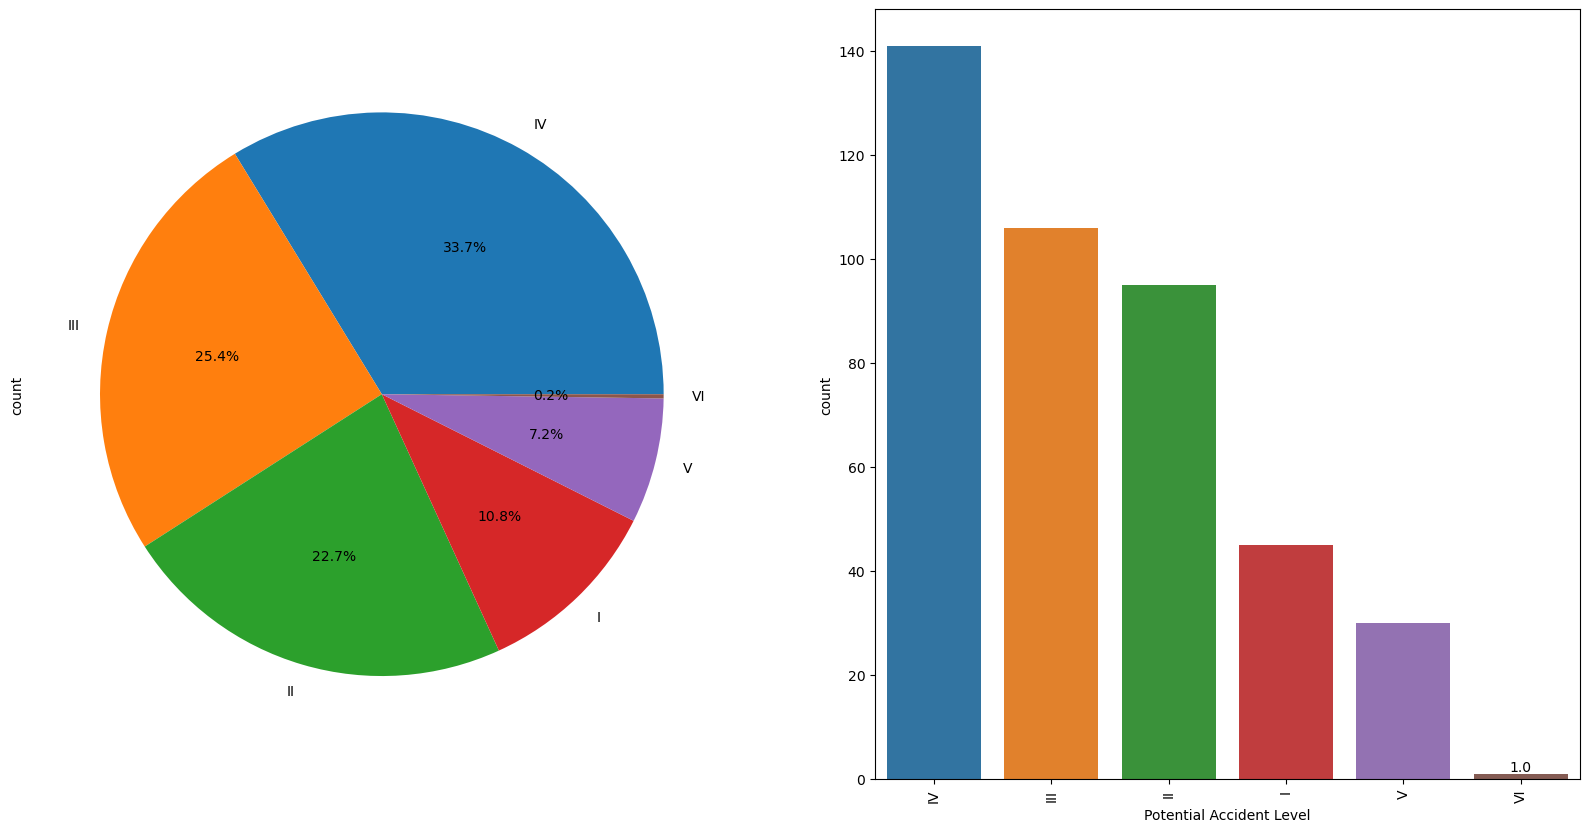

In [18]:
# Potential Accident Level distribution
labeled_barplot(is_df, 'Potential Accident Level', perc=False)

In [19]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

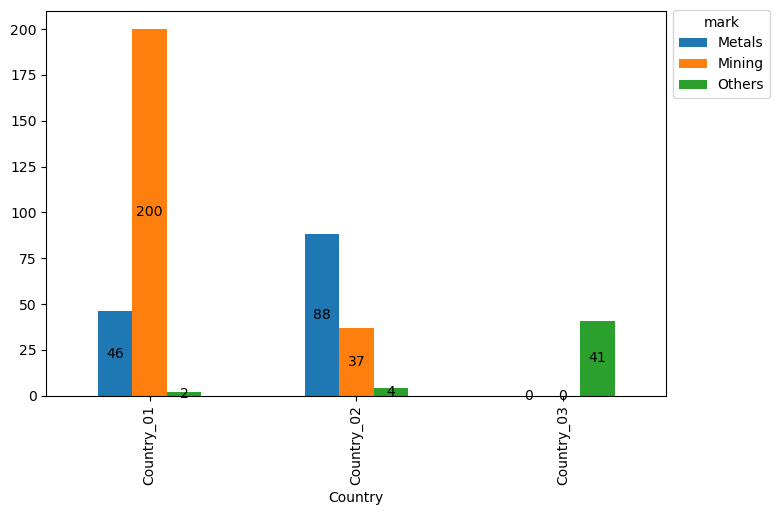

In [20]:
# Check proportion of Industry sector in different countries
crosstab_feature(is_df, 'Country', 'Industry Sector', False)

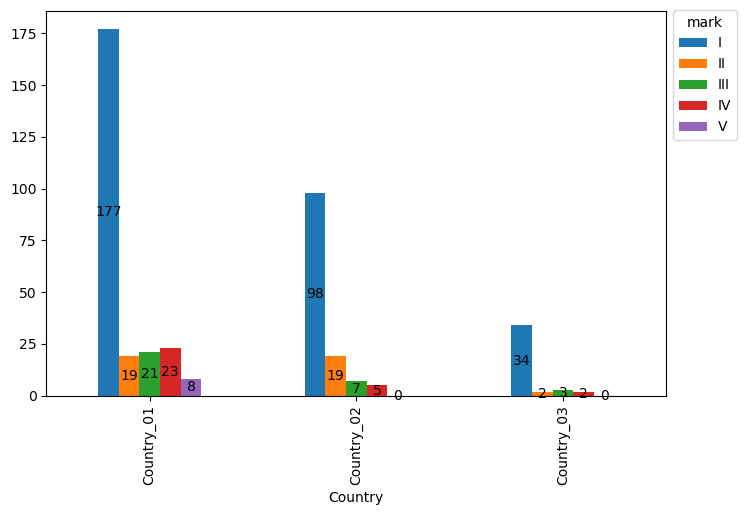

In [21]:
# Proportion of accident level in different coutries
crosstab_feature(is_df, 'Country', 'Accident Level', False)

In [22]:
# Label encoding
is_df['Gender'] = is_df['Gender'].apply(lambda x: {'Male': 0, 'Female': 1}[x])
is_df['Accident Level'] = is_df['Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}[x])
is_df['Potential Accident Level'] = is_df['Potential Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}[x])

is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    int64         
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 32.8+ KB


In [23]:
# Dropping datetime info
is_df.drop(['Date'], axis=1, inplace=True)

In [24]:
# One-hot encoding
is_df = pd.get_dummies(is_df, columns=['Country', 'Local', 'Industry Sector', 'Employee or Third Party', 'Critical Risk'], dtype=np.int64)

In [25]:
is_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Accident Level                                           418 non-null    int64 
 1   Potential Accident Level                                 418 non-null    int64 
 2   Gender                                                   418 non-null    int64 
 3   Description                                              418 non-null    object
 4   Country_Country_01                                       418 non-null    int64 
 5   Country_Country_02                                       418 non-null    int64 
 6   Country_Country_03                                       418 non-null    int64 
 7   Local_Local_01                                           418 non-null    int64 
 8   Local_Local_02                          

In [26]:
# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')  

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prasana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prasana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# To lowercase
is_df['Description_T'] = is_df['Description'].apply(lambda x: x.lower())

In [28]:
# Removing non-alphanumeric chars
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ''.join(re.sub('[^A-Za-z0-9]+', ' ', x)))

In [29]:
# Removing extra white spaces
is_df['Description_T'] = is_df['Description_T'].str.strip()

In [30]:
# Stopword removal
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [31]:
is_df.loc[0:10, ['Description', 'Description_T']]


,Description,Description_T
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unloading operation ustulado bag need unclog d...
6,The collaborator reports that he was on street...,collaborator reports street 09 holding left ha...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sitting resting area level 326 raise ...
9,At the moment the forklift operator went to ma...,moment forklift operator went manipulate big b...


In [32]:
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
is_df['Description_WL'] = is_df.apply(lambda row: nltk.word_tokenize(row['Description_T']), axis=1)
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return ' '.join(new_words)
is_df['Description_WL'] = is_df.apply(lambda x: lemmatize_list(x['Description_WL']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prasana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
is_df.loc[0:10, ['Description', 'Description_WL']]


,Description,Description_WL
0,While removing the drill rod of the Jumbo 08 f...,remove drill rod jumbo 08 maintenance supervis...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump pip uncouple s...
2,In the sub-station MILPO located at level +170...,sub station milpo locate level 170 collaborato...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unload operation ustulado bag need unclog disc...
6,The collaborator reports that he was on street...,collaborator report street 09 hold leave hand ...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sit rest area level 326 raise bore su...
9,At the moment the forklift operator went to ma...,moment forklift operator go manipulate big bag...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_df = pd.DataFrame()
for i in [1,2]:
    tfidf = TfidfVectorizer(max_features=50, stop_words='english',use_idf=True, ngram_range=(i,i))
    X = tfidf.fit_transform(is_df['Description_WL']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in tfidf.get_feature_names_out()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.head(5)

,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_carry,TFIDF_cause,TFIDF_clean,TFIDF_collaborator,TFIDF_come,...,TFIDF_safety gloves,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_transfer medical,TFIDF_use safety,TFIDF_wear safety,TFIDF_work area,TFIDF_worker wear
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.4739,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.2598,0.0000,0.0000,0.1695,0.0000,0.5312,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.3317,0.0000,0.3339,0.0000,0.1956,0.0000,0.0000,0.3508,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.2979,0.0000,0.0000,0.0000,0.1757,0.0000,0.0000,0.3151,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
nlp_chatbot_TF_IDF= is_df.join(tfidf_df.reset_index(drop=True))

In [36]:
nlp_chatbot_TF_IDF.drop(['Description','Description_T','Description_WL'],axis=1,inplace=True)


In [37]:
nlp_chatbot_TF_IDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 157 entries, Accident Level to TFIDF_worker wear
dtypes: float64(100), int64(57)
memory usage: 512.8 KB


In [38]:
nlp_chatbot_TF_IDF.to_csv('nlp_chatbot_TF_IDF.csv', index=False)


In [41]:
# Stemming
#dataset will be used for BOW/N-gram
is_df1=is_df.copy()
ps = PorterStemmer()
is_df1['Description_PS'] = is_df1['Description_T'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
is_df1.loc[0:10, ['Description', 'Description_PS']]

,Description,Description_PS
0,While removing the drill rod of the Jumbo 08 f...,remov drill rod jumbo 08 mainten supervisor pr...
1,During the activation of a sodium sulphide pum...,activ sodium sulphid pump pipe uncoupl sulfid ...
2,In the sub-station MILPO located at level +170...,sub station milpo locat level 170 collabor exc...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approxim nv 1880 cx 695 ob7 personnel beg...
4,Approximately at 11:45 a.m. in circumstances t...,approxim 11 45 circumst mechan anthoni group l...
5,During the unloading operation of the ustulado...,unload oper ustulado bag need unclog discharg ...
6,The collaborator reports that he was on street...,collabor report street 09 hold left hand volum...
7,"At approximately 04:50 p.m., when the mechanic...",approxim 04 50 p mechan technician jo tecnomin...
8,Employee was sitting in the resting area at le...,employe sit rest area level 326 rais bore suff...
9,At the moment the forklift operator went to ma...,moment forklift oper went manipul big bag biox...


In [42]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)
bow_feat = bow_vec.fit_transform(is_df1['Description_PS'])

bow_feat = bow_feat.toarray()
bow_feat.shape

(418, 1000)

In [43]:
# Set of unique words considered by the vectorizer
bow_vec.get_feature_names_out()

array(['00', '01', '018', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '100', '11', '12', '13', '14', '15', '16', '17', '1710',
       '18', '1850', '187', '1880', '19', '1940', '1st', '20', '200',
       '2016', '2017', '22', '24', '25', '26', '27', '2900', '2930',
       '2995', '2m', '2nd', '30', '326', '3300', '3450', '3490', '35',
       '350', '3cm', '3m', '3rd', '40', '440', '45', '4th', '50', '500',
       '54', '5th', '60', '6m', '70', '75', '80', '90', '903', 'abl',
       'abruptli', 'absorb', 'access', 'accessori', 'accid', 'accident',
       'accommod', 'accompani', 'accord', 'accumul', 'acid', 'across',
       'action', 'activ', 'addit', 'adjust', 'advanc', 'affect', 'ahead',
       'aid', 'air', 'albino', 'align', 'allerg', 'allergi', 'alon',
       'along', 'alpha', 'alreadi', 'aluminum', 'amount', 'ampoload',
       'anchor', 'anfoload', 'angl', 'ankl', 'anod', 'anoth', 'appar',
       'appli', 'approach', 'approx', 'approxim', 'arc', 'area',
       'ar

In [44]:
bow_df = pd.DataFrame(bow_feat, columns=[f'cv_{vec}' for vec in bow_vec.get_feature_names_out()])
bow_df.head()

,cv_00,cv_01,cv_018,cv_02,cv_03,cv_04,cv_05,cv_06,cv_07,cv_08,...,cv_wore,cv_work,cv_worker,cv_workshop,cv_would,cv_wound,cv_wrench,cv_wrist,cv_zinc,cv_zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
bow_ds = pd.concat([is_df1, bow_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
bow_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 1058 entries, Accident Level to cv_zone
dtypes: int64(1057), object(1)
memory usage: 3.4+ MB


In [46]:
bow_ds.to_csv('ps_bow.csv', index=False)


In [47]:
bow_ds.shape


(418, 1058)

In [48]:
# Initializing CountVectorizer with top 1000 words
n2g_vec = CountVectorizer(max_features = 1000, ngram_range=(2, 2))
n2g_feat = n2g_vec.fit_transform(is_df1['Description_PS'])

n2g_feat = n2g_feat.toarray()
n2g_feat.shape

(418, 1000)

In [49]:
# Set of unique words considered by the vectorizer
n2g_vec.get_feature_names_out()

array(['00 approxim', '00 pm', '02 2017', '02 employe', '02 sting',
       '02bp0166 chang', '031 remov', '04 member', '10 00', '10 cm',
       '10 day', '10 mr', '10mx0 40m', '11 45', '12 20', '12 cell',
       '13 40', '15 20', '15 kg', '15 meter', '15 oper', '15mx0 10m',
       '16 oper', '1710 cx', '18 40', '1880 cx', '1st degre', '20 meter',
       '2nd finger', '30 approxim', '40 hour', '45 pm', '50 approxim',
       '50 meter', '500 kg', '5th finger', 'access aripuan',
       'access ladder', 'accid employe', 'accid oper', 'accid victim',
       'accid worker', 'accompani geologist', 'activ area',
       'activ employe', 'activ evacu', 'activ follow', 'activ paralyz',
       'activ remov', 'air valv', 'allerg reaction', 'ampoload team',
       'approx 500', 'approxim 20', 'approxim height', 'approxim meter',
       'approxim nv', 'area allerg', 'area proceed', 'area stop',
       'area supervis', 'area verifi', 'aripuan area', 'arm one',
       'arm right', 'arm uniform', 'aroun

In [50]:
n2g_df = pd.DataFrame(n2g_feat, columns=[f'cv_{vec}' for vec in n2g_vec.get_feature_names_out()])
n2g_df.head()

,cv_00 approxim,cv_00 pm,cv_02 2017,cv_02 employe,cv_02 sting,cv_02bp0166 chang,cv_031 remov,cv_04 member,cv_10 00,cv_10 cm,...,cv_worker use,cv_worker wear,cv_workshop level,cv_would enter,cv_wound left,cv_wound right,cv_wound sole,cv_wrist left,cv_zaro team,cv_zinc sheet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
n2g_ds = pd.concat([is_df1, n2g_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
n2g_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 1058 entries, Accident Level to cv_zinc sheet
dtypes: int64(1057), object(1)
memory usage: 3.4+ MB


In [52]:
n2g_ds.to_csv('ps_bigram.csv', index=False)


In [53]:
n2g_ds.shape


(418, 1058)

In [54]:
# Trigram
n3g_vec = CountVectorizer(max_features = 1000, ngram_range=(3, 3))
n3g_feat = n3g_vec.fit_transform(is_df1['Description_PS'])
n3g_feat = n3g_feat.toarray()
n3g_df = pd.DataFrame(n3g_feat, columns=[f'cv_{vec}' for vec in n3g_vec.get_feature_names_out()])
n3g_ds = pd.concat([is_df1, n3g_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
n3g_ds.to_csv('ps_trigram.csv', index=False)
n3g_vec.get_feature_names_out()

array(['02 2017 10', '02 employe insid', '02 sting belli',
       '02bp0166 chang intern', '031 remov suction', '04 member wca',
       '10 50 approxim', '10m impact basket', '10mx0 40m impact',
       '13 40 hour', '15mx0 10m impact', '1710 cx 018', '18 40 hour',
       '1st degre burn', '20mx1 10mx0 40m', '2mx0 15mx0 10m',
       '2nd finger left', '350 meter main', '37km accord inthinc',
       '40 hour mr', '40m impact ampoload', '4288 unexpectedli climb',
       '50 kv lt', '50 meter look', '500 kg 20mx1', '5th finger right',
       '878 return citi', '903 licens plate', 'access aripuan area',
       'access divin assist', 'access machet moment', 'access posit ramp',
       'accid drill assist', 'accid employe use', 'accid truck travel',
       'accid welder use', 'accid worker use', 'accid worker wear',
       'accord inthinc width', 'acid leach stage', 'acid spill line',
       'activ carri pump', 'activ chuteo ore', 'activ employe evalu',
       'activ encount ciliari', 'activ 

In [55]:
n3g_ds.shape


(418, 1058)

In [56]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_bow = pd.read_csv("ps_bow.csv")
safety_df_bow.name = "BOW"
safety_df_bigram = pd.read_csv("ps_bigram.csv")
safety_df_bigram.name = "BIGRAM"
safety_df_trigram = pd.read_csv("ps_trigram.csv")
safety_df_trigram.name = "TRIGRAM"
safety_df_tfidf = pd.read_csv("nlp_chatbot_TF_IDF.csv")
safety_df_tfidf.name = "TFIDF"

In [57]:
# Function to display the dataset shape

def display_df(df_name):
    # Displaying the shape of the dataframe
    print("Shape of dataframe", df_name.name)
    print(df_name.shape)

In [67]:
# Function to upsample the target variable
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
def upsample_df(df_name):

    """
    Upsamples the minority class in the given DataFrame using SMOTE and splits the data into training and test sets.

    Parameters:
    df_name (pd.DataFrame): The DataFrame containing the data to be upsampled and split.

    Returns:
    tuple: A tuple containing:
        - X_train (pd.DataFrame): The features of the training data.
        - y_train (pd.Series): The target variable of the training data.
        - X_test (pd.DataFrame): The features of the test data.
        - y_test (pd.Series): The target variable of the test data.
    """
    
    # Getting the unique value counts from the target column
    print("Displaying the unique values of target column for dataframe", df_name.name)
    print(df_name['Accident Level'].value_counts())
    # Splitting the data
    X = df_name.drop(columns='Accident Level')
    y = df_name['Accident Level']
    smote = SMOTE()
    # Upsampling the data
    X_smote, y_smote = smote.fit_resample(X,y)
    
    # Displaying the shape of the dataframe after upsampling
    print("The shape for data frame X")
    print(X_smote.shape)
    print("The shape for data frame y")
    print(y_smote.shape)
    print('Unique Values for the target variable after sampling:')
    print(y_smote.value_counts())
    
    # Splitting the training data and test data in 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)
    
    # Displaying the shape of dataframe after split
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [68]:
# Declaring a list containing the dataframe
dataframe_list = [safety_df_bow, safety_df_bigram, safety_df_trigram, safety_df_tfidf]

# Calling the function to display the dataframe shape
for df_name in dataframe_list:
    display_df(df_name)

Shape of dataframe BOW
(418, 1058)
Shape of dataframe BIGRAM
(418, 1058)
Shape of dataframe TRIGRAM
(418, 1058)
Shape of dataframe TFIDF
(418, 157)


In [86]:
# WORD2VEC
dataset = is_df.copy()
# Creating a list of all words in our data
words_list = [item.split(" ") for item in dataset['Description'].values]

In [89]:
from gensim.models import Word2Vec
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [90]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4756


In [91]:
# Checking the word embedding of a random word
word = "arm"
model_W2V.wv[word]

array([-1.89591236e-02,  1.22715488e-01, -2.33001690e-02,  5.06984815e-02,
        8.50054063e-03, -8.96064565e-02,  6.68505058e-02,  2.02762902e-01,
        1.47977574e-02, -5.86010292e-02,  3.62011716e-02, -8.32902789e-02,
        2.61335373e-02,  3.28706279e-02, -5.09099700e-02, -7.05991685e-02,
        6.58871904e-02, -1.11192456e-02, -1.67341884e-02, -7.34944716e-02,
       -2.10280493e-02, -6.99741114e-03,  8.06178376e-02,  2.07107719e-02,
        8.54324847e-02,  3.38489152e-02, -1.09140404e-01,  4.77459617e-02,
       -9.05573070e-02, -9.63695347e-02,  2.54645217e-02, -3.59233283e-02,
        1.23686865e-02, -3.90087441e-02, -3.92732210e-02,  4.91389260e-02,
        3.88233587e-02, -7.47507960e-02,  2.24229395e-02, -1.49617195e-02,
       -4.53534797e-02, -6.34324038e-03, -2.75310106e-03, -8.82275626e-02,
        6.06330372e-02,  8.46450999e-02,  1.19822454e-02,  7.85586685e-02,
       -1.83231477e-02,  1.11273237e-01, -2.42085513e-02, -1.21397479e-02,
       -1.09750599e-01,  

In [92]:
# Checking the word embedding of a random word
word = "drill"
model_W2V.wv[word]

array([-2.42782179e-02,  1.40305907e-01, -3.13020758e-02,  6.45426065e-02,
        7.56246597e-03, -1.05542511e-01,  8.31219628e-02,  2.37986043e-01,
        1.62729360e-02, -7.10503757e-02,  4.30162810e-02, -9.49138403e-02,
        2.95979343e-02,  4.24506068e-02, -6.08443879e-02, -8.64429399e-02,
        7.44444504e-02, -8.38423613e-03, -1.85462963e-02, -8.41414928e-02,
       -2.44782791e-02, -3.91169777e-03,  9.39884856e-02,  2.39377823e-02,
        1.00612171e-01,  4.10337225e-02, -1.33076772e-01,  5.34703806e-02,
       -1.09061316e-01, -1.16340868e-01,  2.91400533e-02, -4.45490293e-02,
        1.59787759e-02, -5.07634059e-02, -4.40164283e-02,  6.13222346e-02,
        3.86963747e-02, -9.18882117e-02,  1.98334586e-02, -1.87938586e-02,
       -5.76505959e-02, -2.79250764e-03,  7.96014909e-04, -1.06578924e-01,
        7.44867101e-02,  1.02635451e-01,  1.18572302e-02,  8.88929889e-02,
       -2.00820677e-02,  1.33137375e-01, -2.47127935e-02, -1.46408752e-02,
       -1.34181470e-01,  

In [93]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [94]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [95]:
df_Word2Vec = pd.DataFrame(dataset['Description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.0653,0.4369,-0.0908,0.1919,0.0313,-0.3359,0.2551,0.7343,0.0485,-0.2157,...,0.0426,0.2952,0.3888,0.0020,0.4764,0.4323,0.0953,-0.0637,0.2847,-0.1508
1,-0.0561,0.3719,-0.0775,0.1634,0.0268,-0.2865,0.2175,0.6253,0.0408,-0.1838,...,0.0364,0.2514,0.3310,0.0023,0.4063,0.3682,0.0815,-0.0538,0.2418,-0.1288
2,-0.0630,0.4190,-0.0869,0.1833,0.0308,-0.3220,0.2448,0.7037,0.0467,-0.2063,...,0.0411,0.2831,0.3726,0.0017,0.4569,0.4143,0.0915,-0.0614,0.2721,-0.1445
3,-0.0573,0.3825,-0.0792,0.1674,0.0278,-0.2940,0.2231,0.6421,0.0422,-0.1883,...,0.0374,0.2582,0.3400,0.0019,0.4171,0.3781,0.0833,-0.0557,0.2487,-0.1318
4,-0.0558,0.3701,-0.0764,0.1617,0.0270,-0.2843,0.2158,0.6215,0.0412,-0.1824,...,0.0368,0.2497,0.3286,0.0018,0.4033,0.3653,0.0802,-0.0539,0.2404,-0.1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.0591,0.3992,-0.0823,0.1747,0.0283,-0.3064,0.2325,0.6695,0.0440,-0.1961,...,0.0391,0.2694,0.3550,0.0019,0.4350,0.3947,0.0872,-0.0581,0.2598,-0.1376
414,-0.0636,0.4224,-0.0874,0.1849,0.0303,-0.3241,0.2463,0.7088,0.0468,-0.2078,...,0.0414,0.2851,0.3754,0.0022,0.4597,0.4174,0.0917,-0.0612,0.2742,-0.1462
415,-0.0673,0.4453,-0.0921,0.1954,0.0322,-0.3424,0.2606,0.7482,0.0498,-0.2190,...,0.0440,0.3012,0.3962,0.0019,0.4860,0.4399,0.0974,-0.0651,0.2893,-0.1541
416,-0.0588,0.3914,-0.0809,0.1711,0.0279,-0.3007,0.2288,0.6569,0.0438,-0.1923,...,0.0388,0.2642,0.3470,0.0013,0.4262,0.3866,0.0846,-0.0575,0.2545,-0.1346


In [106]:
#GLOVE


In [109]:

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [110]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [111]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [112]:
# Checking the word embedding of a random word
word = "drill"
glove_model[word]

array([-0.35765  ,  0.81467  , -0.2346   , -0.33073  , -0.55697  ,
       -0.91257  ,  0.13386  ,  0.89648  , -0.68417  ,  0.8944   ,
        0.33198  ,  0.52635  ,  0.54153  ,  0.38754  , -0.38877  ,
       -0.17014  , -0.24252  ,  0.39321  , -0.58885  , -0.44848  ,
        0.50495  ,  0.017128 , -0.040326 , -0.30586  , -0.024022 ,
        0.41875  , -1.1461   ,  0.8086   ,  0.12388  ,  0.21747  ,
       -0.94692  , -0.20167  ,  0.35933  ,  0.15633  , -0.039052 ,
       -0.46565  , -1.2225   , -0.48241  ,  0.65021  , -0.4558   ,
       -0.18787  , -0.05471  , -0.6474   , -0.25599  , -0.16758  ,
       -0.18455  , -0.40177  ,  0.22248  , -0.1685   , -0.60159  ,
       -0.54771  ,  0.37457  , -0.21604  ,  0.77251  , -0.32279  ,
       -0.94642  , -0.081026 , -0.87158  ,  1.3124   ,  1.0501   ,
        0.095171 ,  0.46109  ,  0.91197  ,  0.39826  ,  0.032378 ,
        0.25852  , -0.12024  , -0.29043  , -0.010148 ,  0.22901  ,
        0.26109  , -0.18566  ,  0.030369 ,  0.11884  ,  0.0568

In [113]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [114]:
vec_size=100

In [115]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [116]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(dataset['Description'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.0817,0.0030,0.3137,-0.1788,0.1095,-0.0005,-0.3017,0.2312,-0.3337,0.1416,...,-0.1092,0.0337,-0.2462,0.3666,-0.3569,-0.2151,-0.2339,-0.2113,0.6513,0.1381
1,-0.1690,0.0664,0.2656,-0.0950,0.1351,0.0918,-0.0972,0.2194,-0.2365,0.1819,...,-0.0174,-0.1038,-0.2291,0.2973,-0.4085,-0.1136,-0.1685,-0.2707,0.4354,-0.0220
2,-0.0522,-0.0251,0.3396,-0.1837,0.0911,0.0791,-0.1390,0.2002,-0.2866,0.1695,...,-0.0745,-0.0992,-0.2269,0.3466,-0.3976,-0.0763,-0.2411,-0.1942,0.6338,0.0506
3,-0.1221,-0.0520,0.3575,-0.1819,0.0624,0.1636,-0.2073,0.2095,-0.2912,0.0760,...,-0.0889,0.0137,-0.1855,0.3012,-0.4219,-0.1580,-0.2110,-0.1899,0.6678,0.1055
4,-0.0539,0.0182,0.3973,-0.1346,0.0370,0.1288,-0.1737,0.2378,-0.3696,0.1529,...,-0.0051,0.0086,-0.2114,0.3136,-0.4450,-0.0484,-0.2041,-0.2451,0.6723,-0.0320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.1223,-0.0042,0.3613,-0.1051,0.0051,0.1555,-0.1973,0.2986,-0.3189,0.1487,...,-0.0367,-0.0061,-0.1908,0.3604,-0.3760,-0.2403,-0.1956,-0.1619,0.6499,0.1230
414,-0.0465,-0.0678,0.3051,-0.3013,0.0341,0.0753,-0.2320,0.1401,-0.0840,0.1605,...,-0.0720,-0.0425,-0.1389,0.2776,-0.4135,-0.0990,-0.1239,-0.2400,0.6183,-0.0600
415,-0.0893,-0.0627,0.3874,-0.1999,0.0418,0.2442,-0.1938,0.2050,-0.3598,0.1130,...,0.0242,-0.1322,-0.2336,0.3970,-0.4296,0.0054,-0.2504,-0.1802,0.6564,0.0568
416,-0.2234,-0.1004,0.3445,-0.1597,0.1357,0.2109,-0.1984,0.1555,-0.3767,0.1838,...,-0.1120,-0.0543,-0.1440,0.3108,-0.3933,-0.1944,-0.1813,-0.1822,0.5908,0.0145
